**Set up modules and database connection**

In [15]:
import configparser
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
config = configparser.ConfigParser()
config.read('config.ini')
conn = psycopg2.connect(
        host = config['postgres']['host'],
        dbname = config['postgres']['dbname'],
        user = config['postgres']['user']
    )

**Pull data from database and set up scatter chart function**

In [7]:
stock_sql="""
     SELECT *
     FROM stock_1_pivot_avg
    """
data = pd.read_sql_query(stock_sql, conn)

In [11]:
print(data)

            date     rsp   sche    sp500   splv    vwo
0     2021-05-14  148.39  31.42      NaN  60.98  51.54
1     2021-05-13  148.60  31.51  4129.02  61.12  51.71
2     2021-05-12  149.52  31.89  4159.04  61.28  52.35
3     2021-05-11  150.54  32.18  4193.69  61.58  52.85
4     2021-05-10  150.53  32.20  4197.56  61.53  52.89
...          ...     ...    ...      ...    ...    ...
4537  2003-05-07   19.99    NaN      NaN    NaN    NaN
4538  2003-05-06   19.86    NaN      NaN    NaN    NaN
4539  2003-05-05   19.79    NaN      NaN    NaN    NaN
4540  2003-05-02   19.71    NaN      NaN    NaN    NaN
4541  2003-05-01   19.53    NaN      NaN    NaN    NaN

[4542 rows x 6 columns]


In [9]:
def make_chart (x, y, type):
    chart_data = data[[x,y]]
    chart_data = chart_data[chart_data[y].notna()]
    chart_data = chart_data[chart_data[x].notna()]
    if type == 'scatter':
        sns.regplot(x=chart_data[x],y=chart_data[y])
    if type == 'line':
        chart_data.plot.line(x=x, y=y)

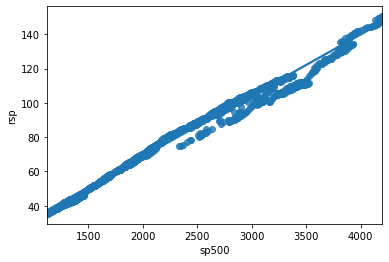

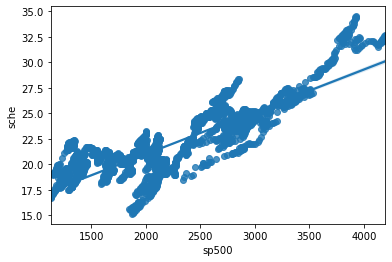

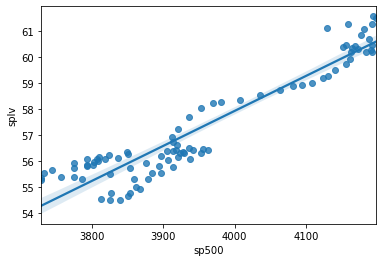

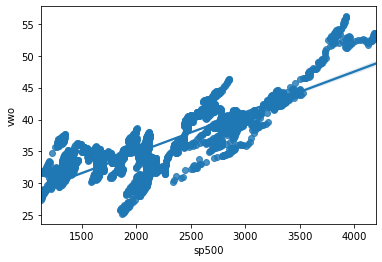

In [29]:
tests = [
    ('sp500','rsp','scatter'), ('sp500','sche','scatter'),('sp500','splv','scatter'),
    ('sp500','vwo','scatter')
        ]
for test in tests:
    plt.figure()
    make_chart(test[0],test[1],test[2])

In [14]:
reg = data[['sp500', 'rsp']]
reg = reg[reg['sp500'].notna()]
reg = reg[reg['rsp'].notna()]
x = reg[['sp500']]
y = reg[['rsp']]
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    rsp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.027e+06
Date:                Sun, 16 May 2021   Prob (F-statistic):                        0.00
Time:                        19:56:45   Log-Likelihood:                         -6241.5
No. Observations:                2518   AIC:                                  1.249e+04
Df Residuals:                    2517   BIC:                                  1.249e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
stock_sql="""
     SELECT *
     FROM stock_1_pivot_lag
    """
data2 = pd.read_sql_query(stock_sql, conn)

In [19]:
print(data2)

            date   rsp  sche  sp500  splv   vwo
0     2021-05-14 -0.14 -0.29    NaN -0.23 -0.34
1     2021-05-13 -0.61 -1.20  -0.72 -0.25 -1.21
2     2021-05-12 -0.67 -0.91  -0.83 -0.50 -0.95
3     2021-05-11  0.00 -0.06  -0.09  0.09 -0.07
4     2021-05-10  0.36  0.08   0.14  0.42  0.09
...          ...   ...   ...    ...   ...   ...
4537  2003-05-07  0.62   NaN    NaN   NaN   NaN
4538  2003-05-06  0.38   NaN    NaN   NaN   NaN
4539  2003-05-05  0.39   NaN    NaN   NaN   NaN
4540  2003-05-02  0.92   NaN    NaN   NaN   NaN
4541  2003-05-01   NaN   NaN    NaN   NaN   NaN

[4542 rows x 6 columns]


In [26]:
def make_chart2 (x, y, type):
    chart_data = data2[[x,y]]
    chart_data = chart_data[chart_data[y].notna()]
    chart_data = chart_data[chart_data[x].notna()]
    if type == 'scatter':
        sns.regplot(x=chart_data[x],y=chart_data[y])
    if type == 'line':
        chart_data.plot.line(x=x, y=y)

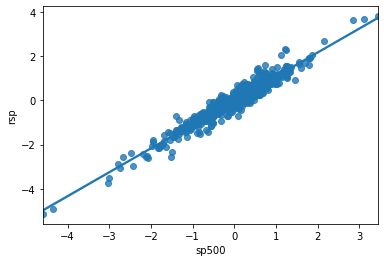

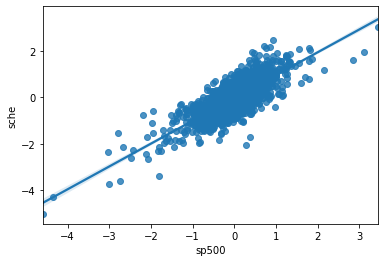

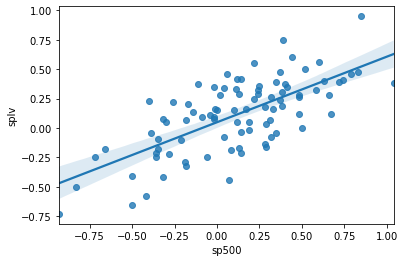

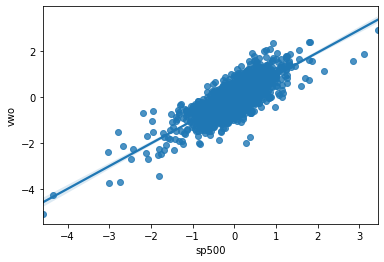

In [30]:
tests2 = [
    ('sp500','rsp','scatter'), ('sp500','sche','scatter'),('sp500','splv','scatter'),
    ('sp500','vwo','scatter')
        ]
for test in tests2:
    plt.figure()
    make_chart2(test[0],test[1],test[2])

In [28]:
reg = data2[['sp500', 'rsp']]
reg = reg[reg['sp500'].notna()]
reg = reg[reg['rsp'].notna()]
x = reg[['sp500']]
y = reg[['rsp']]
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    rsp   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          3.786e+04
Date:                Sun, 16 May 2021   Prob (F-statistic):                        0.00
Time:                        20:00:08   Log-Likelihood:                          1322.0
No. Observations:                2517   AIC:                                     -2642.
Df Residuals:                    2516   BIC:                                     -2636.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
reg = data2[['sp500', 'splv']]
reg = reg[reg['sp500'].notna()]
reg = reg[reg['splv'].notna()]
x = reg[['sp500']]
y = reg[['splv']]
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   splv   R-squared (uncentered):                   0.530
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                              100.4
Date:                Sun, 16 May 2021   Prob (F-statistic):                    2.94e-16
Time:                        20:07:35   Log-Likelihood:                          6.1584
No. Observations:                  90   AIC:                                     -10.32
Df Residuals:                      89   BIC:                                     -7.817
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------